In [1]:
# =============================================================================
# Simulations on angiogenesis on fBm
# Date 15-8-2024
# =============================================================================

# %% Functions and classes for simulating angiogenesis
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from fbm.sim.davies_harte import DaviesHarteFBmGenerator
from fbm.sim.cholesky import CholeskyFBmGenerator
import time
# import scipy.integrate as spi
import statsmodels.api as sm
import pandas as pd
import scipy.stats as stats
from scipy.spatial import distance
from joblib import Parallel, delayed
from functools import partial

from tqdm import tqdm
import warnings


class Gradient:

    def __init__(self, a0, *args, **kwargs):
        self.initial_grad = a0

    def calculate_gradient(self, x):
        pass


class GradientConstant(Gradient):
    def __init__(self, a0):
        super().__init__(a0)

    def calculate_gradient(self, x):
        x_grad = 0
        y_grad = self.initial_grad / self.initial_grad

        return np.array([x_grad, y_grad])

class LinearGradient(Gradient):
    def __init__(self, a0, xa, min_gradient):
        '''
        a0: Concentration at source
        
        xa: x coordinate of the source
        
        min_gradient: minimum gradient
        '''
        super().__init__(a0)
        self.xa = xa
        
        self.min_gradient = min_gradient
    def calculate_gradient(self, x):
        x_grad = 0
        m = (self.initial_grad - self.min_gradient ) / (self.xa[1])
        y_grad = m * x[1] + self.min_gradient
        
        return np.array([x_grad, y_grad])/self.initial_grad
        

# class ChargeGradient(Gradient):
#     def __init__(self, a0, xa, ya):
#         super().__init__(a0)
#         self.xa = xa
#         self.ya = ya
#     def calculate_gradient(self, x):
        
        

In [ ]:
class ExponentialGradient(Gradient):
    def __init__(self, a0, xa):
        super().__init__(a0)
        self.xa = xa
    def calculate_gradient(self, x):
        

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Initial parameter values
A0, B0, wall0 = 1, 3, 1

# Create the figure and axis
fig, ax = plt.subplots(figsize=(6, 4))
x = np.linspace(0, wall0, 100)
line, = ax.plot(x, A0 * (1 - np.exp(-B0 * x)))
marker_line = ax.axvline(-np.log(1/2)/B0, color='r', linestyle='--')  # Vertical line for characteristic distance
marker_text = ax.text(-np.log(1/2)/B0, A0 / 2, f'x = {-np.log(1/2)/B0:.2f}', color='red', fontsize=10)

ax.set_xlim(0, wall0)
ax.set_ylim(0, A0)
plt.close(fig)  # Prevent duplicate display

# Create sliders using ipywidgets
slider_A = widgets.FloatSlider(value=A0, min=0.1, max=5.0, step=0.1, description='A:')
slider_B = widgets.FloatSlider(value=B0, min=0.01, max=10.0, step=0.01, description='B:')
slider_wall = widgets.FloatSlider(value=wall0, min=0.1, max=50.0, step=0.1, description='Wall:')

# Define the update function
def update_plot(A, B, wall):
    x = np.linspace(0, wall, 100)
    y = A * (1 - np.exp(-B * x))
    line.set_data(x, y)
    ax.set_xlim(0, wall)
    ax.set_ylim(0, A)
    
    # Update marker line and text
    x_half = -np.log(1/2) / B
    marker_line.set_xdata([x_half, x_half])  # Set vertical line position
    marker_text.set_position((x_half, A / 2))  # Update text position
    marker_text.set_text(f'x = {x_half:.2f}')  # Update text content

    clear_output(wait=True)
    display(fig)
    plt.show()

# Use interactive display for the sliders
interactive_plot = widgets.interactive(update_plot, A=slider_A, B=slider_B, wall=slider_wall)
display(interactive_plot)


interactive(children=(FloatSlider(value=1.0, description='A:', max=5.0, min=0.1), FloatSlider(value=3.0, descr…

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Initial parameter values
A0, wall0, coef0 = 1, 1, 0.01  # Added coef0

# Create the figure and axis
fig, ax = plt.subplots(figsize=(6, 4), dpi = 300)
x = np.linspace(0, wall0, 100)
B0 = -np.log(coef0) / wall0  # Calculate initial B
line, = ax.plot(x, A0 * (1 - np.exp(-B0 * x)))
ax.set_xlim(0, wall0)
ax.set_ylim(0, A0)

plt.close(fig)  # Prevent duplicate display

# Create sliders using ipywidgets
slider_A = widgets.FloatSlider(value=A0, min=0.1, max=5.0, step=0.1, description='A:')
slider_wall = widgets.FloatSlider(value=wall0, min=0.1, max=50.0, step=0.1, description='Wall:')
slider_coef = widgets.FloatSlider(value=coef0, min=0.001, max=1.0, step=0.00001, description='Coef:')

# Define the update function
def update_plot(A, wall, coef):
    # Calculate B dynamically based on coef and wall
    B = -np.log(coef) / wall  
    x = np.linspace(0, wall, 100)
    y = A * (1 - np.exp(-B * x))
    
    # Update the plot with new values
    line.set_data(x, y)
    ax.set_xlim(0, wall)
    ax.set_ylim(0, A)
    # ax.axvline(-np.log(1/2)/B, color='r', linestyle='--')  # Vertical line for characteristic distance
    # ax.text(-np.log(1/2)/B, A / 2, f'x = {-np.log(1/2)/B0:.2f}', color='red', fontsize=10)

    # Display A, wall, and B values in the title
    ax.set_title(f'A = {A:.2f}, Wall = {wall:.1f}, Coef = {coef:.3f}, B = {B:.3f}')
    
    # Refresh the plot
    clear_output(wait=True)
    display(fig)
    plt.show()

# Use interactive display for the sliders
interactive_plot = widgets.interactive(update_plot, A=slider_A, wall=slider_wall, coef=slider_coef)
display(interactive_plot)


interactive(children=(FloatSlider(value=1.0, description='A:', max=5.0, min=0.1), FloatSlider(value=1.0, descr…

In [23]:
-np.log(0)/50

/var/folders/zv/p838yyl57rb2tlk802d5y2hh0000gn/T/ipykernel_8665/901295736.py:1: RuntimeWarning: divide by zero encountered in log
  -np.log(0)/50


np.float64(inf)

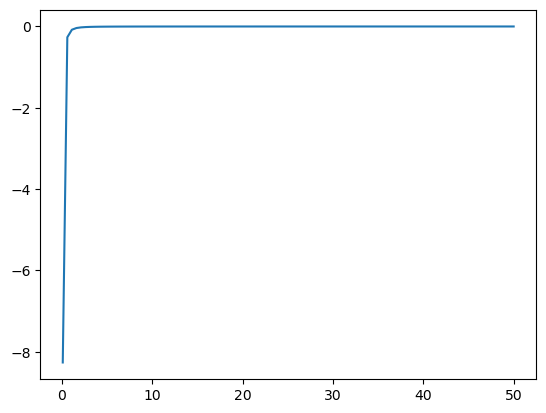

In [40]:
R = 0.1
r = np.linspace(R+0.01, 50, 100)
grad = -R/r**2

plt.plot(r, grad)

(0.0, 1.0)

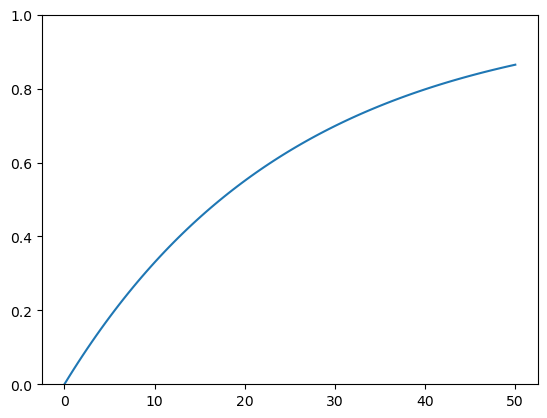

In [78]:
fig, ax = plt.subplots()
a0 = 1
A = a0
wall = 50
prop = 0.99
B = -np.log(1-A*prop)/(wall)
x = np.linspace(0, wall, 100)
y = A * (1 - np.exp( -x/wall*2))
ax.plot(x, y)
ax.set_ylim(0, 1)
